###  Оптимальная шкала средних ставок подоходного налога:

 

 \begin{equation*}
	y_{opt}(x) = 
	 \begin{cases}
	  	y_- ,   &0\leq x<x_-,  \\
 	  	1 - \left ( \frac{x_-}{x} \right )^\sigma , &x_-\leq x<x_0,  \\
        1 -(1-y_+) \left ( \frac{x_+}{x} \right )^\delta , &x_0\leq x \leq x_+,  \\
        y_+ , &x>x_+;  \\
	 \end{cases}
 \end{equation*}



In [2]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Калькулятор оптимальной шкалы ставок:

............... Итоговые значения: ...............
Прожиточный минимум: 240000
Нижняя граница доходов среднего класса: 1200000
Размер дохода налогоплательщица, начиная с которого доход взимается по максимальной средней ставке у+: 4800000
Максимальная ставка подоходного налога: 30 %
..................................................
17 %  < Yo <  30 %
Диапазон целых значений Yo:  [18 19 20 21 22 23 24 25 26 27 28 29]
Выбранный Yo: 24 %
sigma:  0.17052
delta:  0.05932
..................................................
Yopt:  
  0 , 0 ≤ X < 240000 , 
  1 -( 240000 / X)^ 0.17052 , 240000  ≤ X <  1200000 , 
  1 - (1- 0.3 )( 4800000 / X)^ 0.05932 , 1200000  ≤ X ≤  4800000 , 
  0.3 , X >  4800000 ;
..................................................


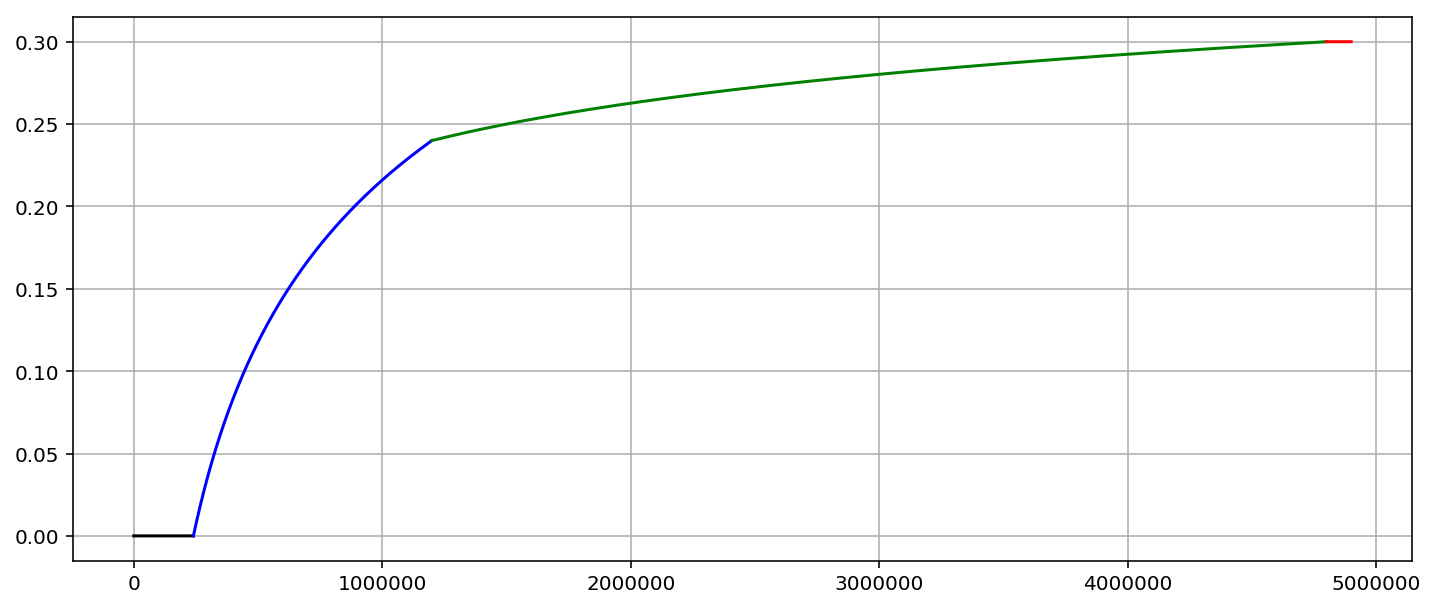

In [3]:
def parameters(x_,kx_zero,kx_plus, y_plus, y_zero):
    print(15*'.','Итоговые значения:',15*'.')
    print('Прожиточный минимум:' ,12*x_)
    print('Нижняя граница доходов среднего класса:' ,12*kx_zero*x_)
    print('Размер дохода налогоплательщица, начиная с которого доход взимается по максимальной средней ставке у+:' ,12*kx_plus*x_)
    print('Максимальная ставка подоходного налога:', y_plus,'%')
    print(50*'.')
    left_border = 1-(1-y_plus/100)**((np.log(12*x_) - np.log(12*kx_zero*x_))/(np.log(12*x_) - np.log(12*kx_plus*x_)))
    #print('{0:.4f}'.format(left_border), ' < Yo < ', np.min([y_plus/100, 1-1/kx_zero]))
    print( int(left_border*100),'%', ' < Yo < ', int(100*np.min([y_plus/100, 1-1/kx_zero])),'%')
    
    yos = np.arange(int(left_border*100)+1,int(100*np.min([y_plus/100, 1-1/kx_zero])))
    print('Диапазон целых значений Yo: ',yos)
    print('Выбранный Yo:',y_zero, '%')
    
    delta = '{0:.5f}'.format(np.log((1-y_zero/100)/(1-y_plus/100))/np.log(kx_plus/kx_zero))
    sigma = '{0:.5f}'.format(np.log(1-y_zero/100)/np.log(1/kx_zero))
    
    print('sigma: ',sigma)
    print('delta: ',delta)
    print(50*'.')
    print('Yopt: ','\n ',0,', 0 ≤ X <',12*x_,',',
                   '\n ','1 -(',12*x_,'/ X)^',sigma,',',12*x_ ,' ≤ X < ',12*kx_zero*x_,',',
                   '\n ','1 - (1-',y_plus/100,')(',12*kx_plus*x_,'/ X)^',delta,',',12*kx_zero*x_,' ≤ X ≤ ',12*kx_plus*x_,',',
                   '\n ',y_plus/100,',','X > ',12*kx_plus*x_,';')
    #≥ ≤
    #Прорисовка графика
    x1 = np.arange(0,12*x_,1)
    x2 = np.arange(12*x_,12*kx_zero*x_,1)
    x3 = np.arange(12*kx_zero*x_,12*kx_plus*x_,1)
    x4 = np.arange(12*kx_plus*x_, 12*kx_plus*x_+100000,1)
    ########
    y1 = 0*x1
    y2 =1-(12*x_/x2)**(np.log(1-y_zero/100)/np.log(1/kx_zero))
    y3 = 1-(1-y_plus/100)*(12*kx_plus*x_/x3)**(np.log((1-y_zero/100)/(1-y_plus/100))/np.log(kx_plus/kx_zero))
    y4 = np.full(len(x4),y_plus/100)
    
    xs = [x1,x2,x3,x4]
    ys = [y1,y2,y3,y4]
    cols =['black','blue','green','red']
    plt.figure(figsize=(12,5))
    plt.grid()
    for i,j,c in zip(xs,ys,cols):
        plt.plot(i,j, color=c)
          
    
    print(50*'.')
widgets.interact(parameters, 

                 x_ = widgets.IntText(
                    value=10187,
                    description='X_:',
                    disabled=False),
                 kx_zero = widgets.IntText(
                    value=5,
                    description='Коэф. Xо:',
                    disabled=False),
                 kx_plus = widgets.IntText(
                    value=20,
                    description='Коэф. X+:',
                    disabled=False),
                 y_plus = widgets.IntText(
                    value=25,
                    description='Y+,%:',
                    disabled=False),
                 y_zero = widgets.IntText(
                    value=15,
                    description='Выбран Yo,%:',
                    disabled=False),
                )

In [142]:
x1 = np.arange(0,122244,1)
x2 = np.arange(122244,611220,1)
x3 = np.arange(611220,2444880,1)
x4 = np.arange(2444880, 2700000,1)

In [143]:
y1 = 0*x1
y2 = 1-(122244/x2)**0.10098
y3 = 1-(1-0.25)*(2444880/x3)**0.09029
y4 = np.full(len(x4),0.25)

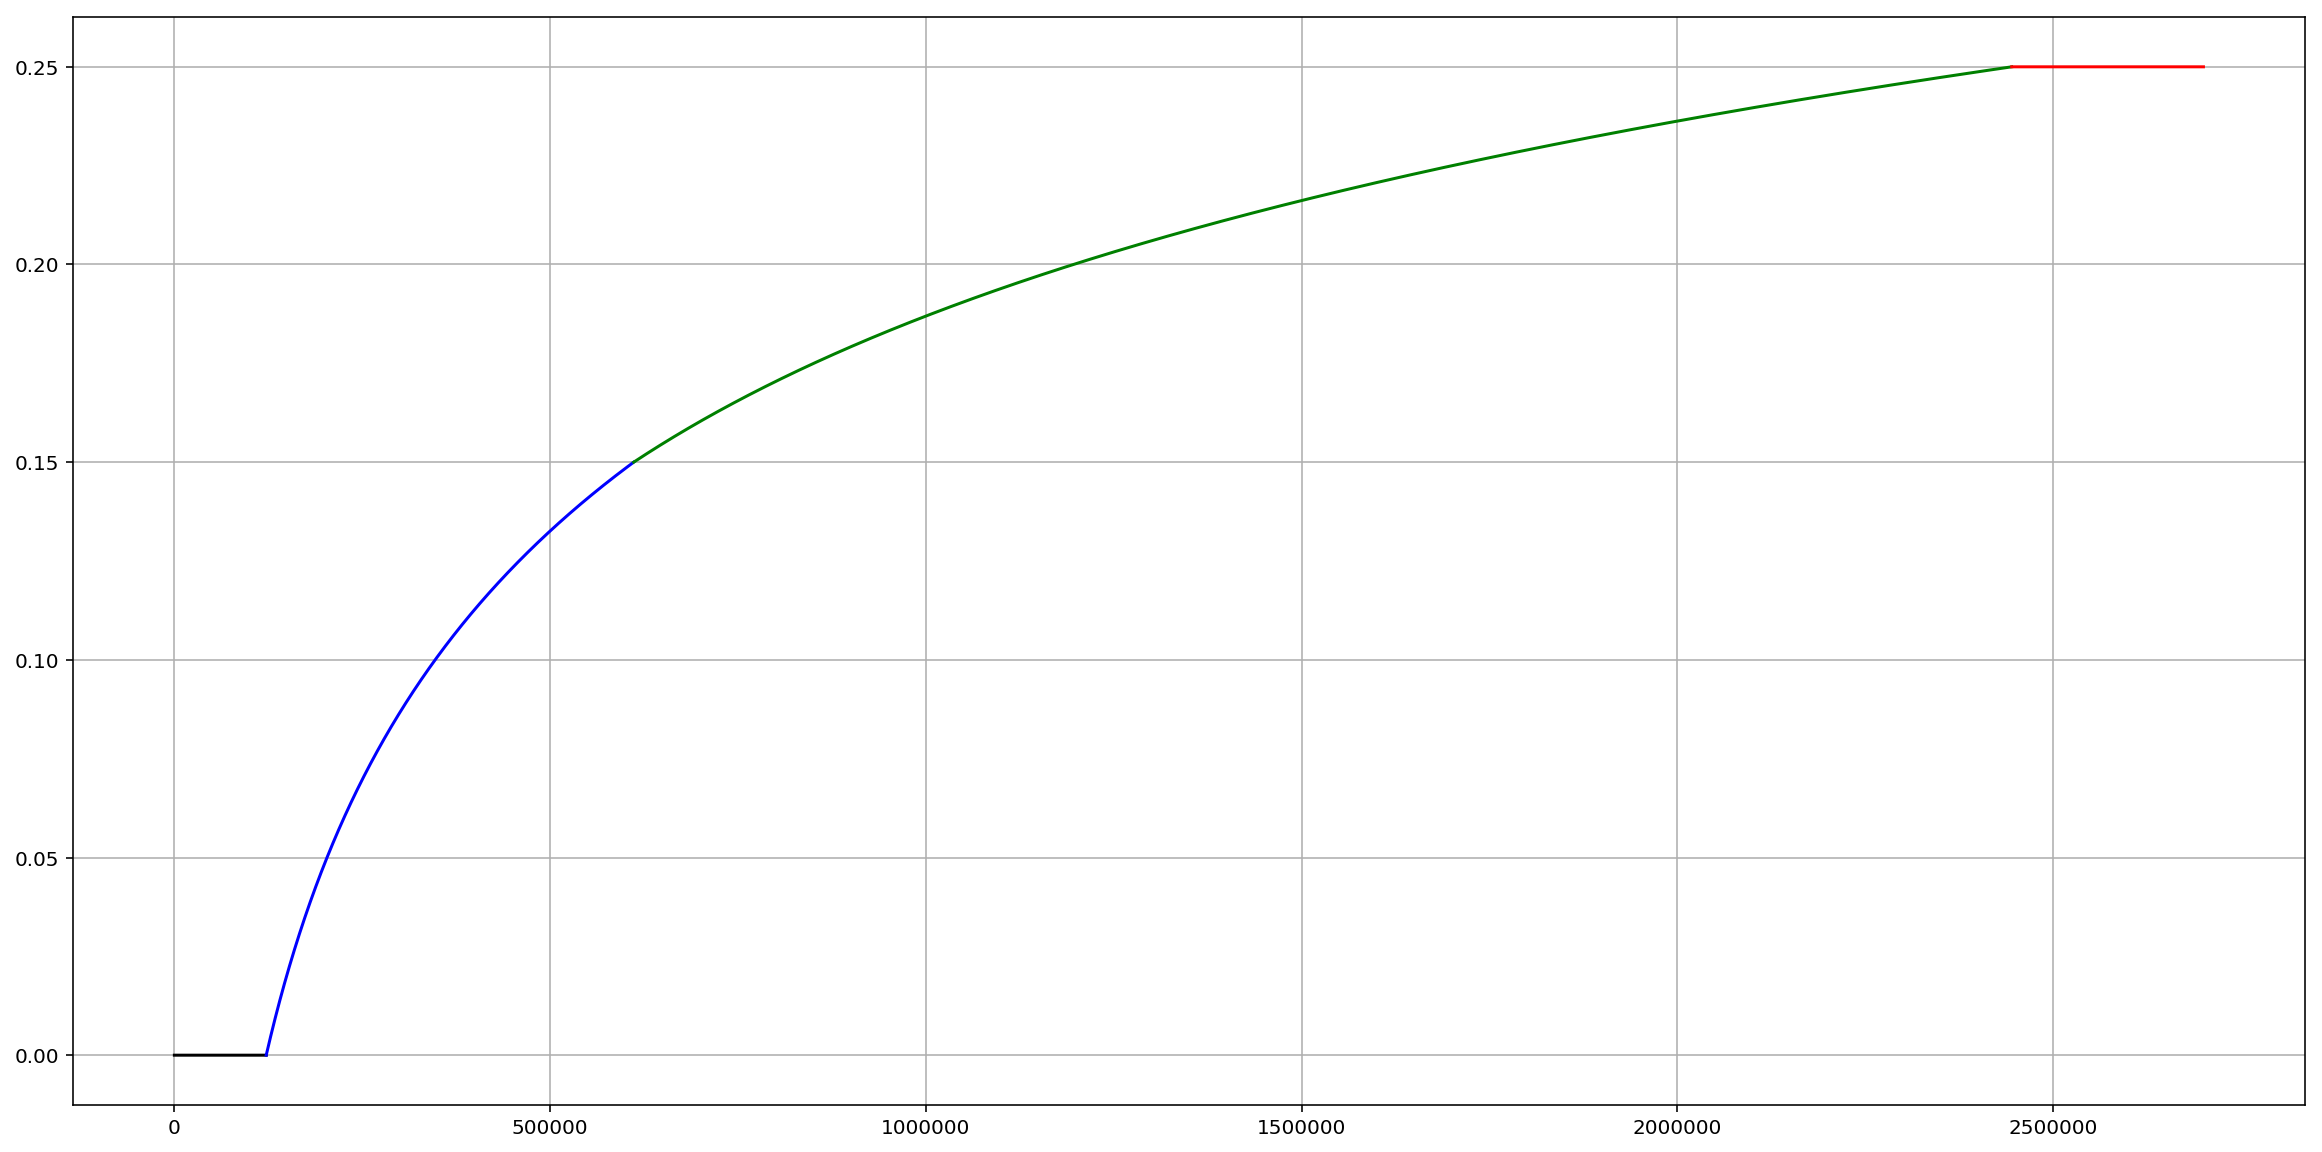

In [144]:
plt.figure(figsize=(20,10))

plt.plot(x1,y1, color='black')
plt.plot(x2,y2, color='blue')
plt.plot(x3,y3,color='green')
plt.plot(x4,y4,color='red')
plt.grid() 
plt.show()

